# CNN classifier for MNIST

### Name: Srikanth Sarma

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf


# Network architecture:
## 6 Convolutions (5x5), max pooling (2x2), 16 Convolutions (5x5), max pooling (2x2), flatten, dense (784x120), dense (120x84), logits (84x10)

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
MNIST = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [8]:
features = tf.placeholder(tf.float32, shape=[None,784])
labels = tf.placeholder(tf.int32, shape=None)
learning_rate_gd = tf.placeholder(tf.float32)

input_layer = tf.reshape(features, [-1, 28, 28, 1])

conv1 = tf.layers.conv2d(inputs=input_layer,filters=6,kernel_size=[5, 5],padding="SAME",activation=tf.nn.relu)

pool1 = tf.layers.max_pooling2d(inputs=conv1, pool_size=[2, 2], strides=2)

conv2 = tf.layers.conv2d(inputs=pool1,filters=16,kernel_size=[5, 5],padding="SAME",activation=tf.nn.relu)

pool2 = tf.layers.max_pooling2d(inputs=conv2, pool_size=[2, 2], strides=2)

flat = tf.reshape(pool2, [-1, 784])

dense1 = tf.layers.dense(inputs=flat, units=120, activation=tf.nn.relu)

dense2 = tf.layers.dense(inputs=dense1, units=84, activation=tf.nn.relu)

logits = tf.layers.dense(inputs=dense2, units=10)

loss = tf.losses.softmax_cross_entropy(onehot_labels=labels, logits=logits)

init = tf.global_variables_initializer()

train_op = tf.train.GradientDescentOptimizer(learning_rate=learning_rate_gd).minimize(loss)

predicted = tf.argmax(logits, axis=1)

true = tf.argmax(labels, axis = 1)
n_correct = tf.cast(tf.equal(predicted, true), tf.float32)
accuracy = tf.reduce_mean(n_correct)*100

# Training details: 
## mini-batch gradient descent with batch_size = 100, number of epochs, max_epoch = 10

Training Completed


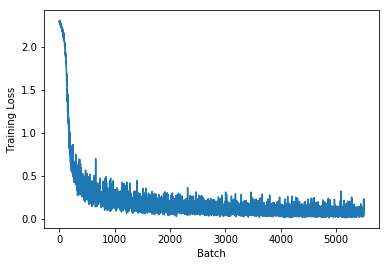

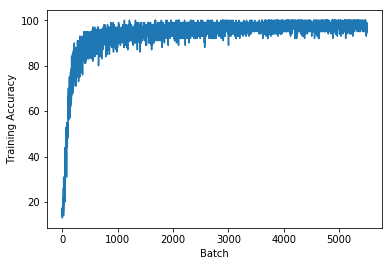

Percentage testing Accuracy: 97.869995


In [12]:
max_epoch = 10
batch_size = 100
n_batches = int(MNIST.train.num_examples/batch_size)
training_loss = np.zeros(max_epoch*n_batches)
training_accuracy = np.zeros(max_epoch*n_batches)
count = 0
learning_rate  = 0.01
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(max_epoch):
        for i in range(n_batches):
            features_batch, labels_batch = MNIST.train.next_batch(batch_size,shuffle=True)
            _,training_loss[count],training_accuracy[count] = sess.run(
                [train_op, loss, accuracy], feed_dict=
                {features:features_batch,labels:labels_batch,learning_rate_gd: learning_rate})
            # learning rate annealing:
            # learning_rate = learning_rate**1.001
            count += 1
    print("Training Completed")
    features_batch, labels_batch = MNIST.test.next_batch(MNIST.test.num_examples,shuffle=True)
    testing_accuracy = sess.run(accuracy, feed_dict=
                                {features:features_batch,labels:labels_batch,learning_rate_gd: learning_rate})

plt.plot(training_loss)
plt.ylabel("Training Loss")
plt.xlabel("Batch")
plt.show()

plt.plot(training_accuracy)
plt.ylabel("Training Accuracy")
plt.xlabel("Batch")
plt.show()

print("Percentage testing Accuracy:",testing_accuracy)